# Ejemplo de BCA

Protocolo de transmision de informacion

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from scipy.stats import ortho_group

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

In [3]:
from BSS import Mezcla_imagenes, unmixing_error, BCA

In [4]:
# funcion de utilidad
def ver_2_matrices(matriz_1, matriz_2, titulo_1 = "Imagen 1", titulo_2 = "Imagen 2"):
    
    # ver ambas imagenes
    fig, ax = plt.subplots(1, 2, figsize = (6, 3))
    # matriz_1 
    ax[0].imshow(matriz_1, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(titulo_1)
    # matriz_2
    ax[1].imshow(matriz_2, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(titulo_2)
    plt.show()

In [5]:
# delimitar el tamño de las imagenes
n = 25

Shape of Image 1: (25, 25)
Shape of Image 2: (25, 25)


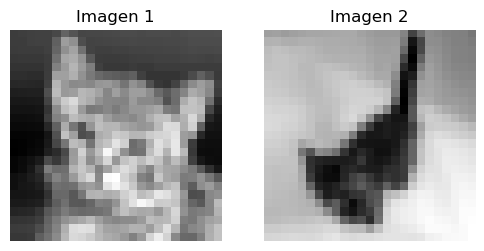

In [6]:
# cargar la primera imagen
ruta_imagen = "../Images/cat.jpg"
imagen_original_1 = io.imread(ruta_imagen, as_gray = True)
# hacer que sea nxn
imagen_1 = transform.resize(imagen_original_1, (n, n), anti_aliasing=True)

# cargar la segunda imagen
ruta_imagen = "../Images/cat2.jpg"
imagen_original_2 = io.imread(ruta_imagen, as_gray = True)
# hacer que sea nxn
imagen_2 = transform.resize(imagen_original_2, (n, n), anti_aliasing=True)

# ver ambas imagenes
print(f"Shape of Image 1: {imagen_1.shape}")
print(f"Shape of Image 2: {imagen_2.shape}")
ver_2_matrices(imagen_1, imagen_2, titulo_1 = "Imagen 1", titulo_2 = "Imagen 2")

In [7]:
# delimitar una rotacion 
# tomar una matriz ortogonal aleatoria (medida de Haar)
U = ortho_group.rvs(dim=n**2)
print(f"Shape of U: {U.shape}")

# delimitar un vector unitario
v = np.random.random(n)
v = v / np.linalg.norm(v)
v = v.reshape(-1, 1) # hace vector columna
print(f"Shape of v: {v.shape}")

# vector auxiliar
v_tens_v = np.kron(v, v)
print(f"Shape of v_tens_v: {v_tens_v.shape}")

# matriz auxiliar
P = v @ v.T
print(f"Shape of P: {P.shape}")

Shape of U: (625, 625)
Shape of v: (25, 1)
Shape of v_tens_v: (625, 1)
Shape of P: (25, 25)


Shape of B1: (625, 625)
Shape of B2: (625, 625)


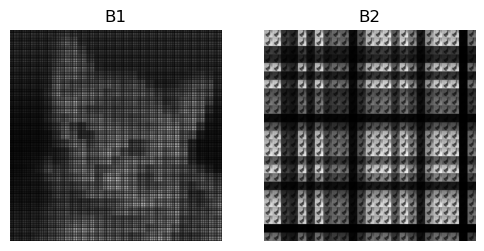

In [8]:
# hacer matrices independientes en sentido booleano B1 y B2
B1 = np.kron(imagen_1, P)
B2 = np.kron(P, imagen_2)

print(f"Shape of B1: {B1.shape}")
print(f"Shape of B2: {B2.shape}")

# verlas ambas imagenes
ver_2_matrices(B1, B2, titulo_1 = "B1", titulo_2 = "B2")

Shape of Y1: (625, 625)
Shape of Y2: (625, 625)


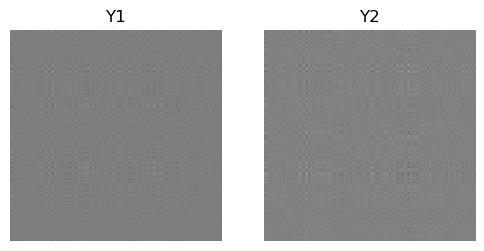

In [9]:
# calcular Z1 y Z2
# (recordar que U es real)
Z1 = U @ B1 @ U.T
Z2 = U @ B2 @ U.T

# hacer la mezcla manualmente
Y1 = Z1 + Z2
Y2 = Z1 - Z2

# verlas ambas imagenes
print(f"Shape of Y1: {Y1.shape}")
print(f"Shape of Y2: {Y2.shape}")
ver_2_matrices(Y1, Y2, titulo_1 = "Y1", titulo_2 = "Y2")

**Alice transmite publicamente esa informacion a Bob**



Shape of Yn1: (625, 625)
Shape of Yn2: (625, 625)


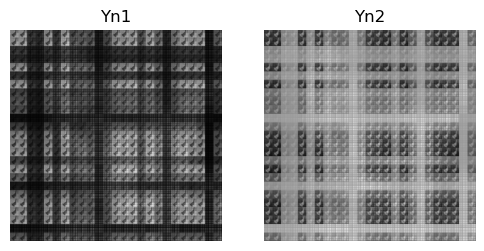

In [10]:
# bob primero aplica la inversa de la rotacion
Yn1 = U.T @ Y1 @ U  # esto es B1 + B2
Yn2 = U.T @ Y2 @ U  # esto es B1 - B2

# poner juntas
Yn = [Yn1, Yn2]

# verlas ambas imagenes
print(f"Shape of Yn1: {Yn1.shape}")
print(f"Shape of Yn2: {Yn2.shape}")
ver_2_matrices(Yn1, Yn2, titulo_1 = "Yn1", titulo_2 = "Yn2")

In [11]:
# aplicar BCA a Yn usando el vector v_tens_v
bca_bob = BCA(señales_y = Yn, vector_v = v_tens_v)
B_hat = bca_bob.separar_señaes(repeticiones_optimizacion = 2, iniciar_W_ortogonal = False)

C:\Users\diego\anaconda3\envs\ds\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Shape of B_hat 1: (625, 625)
Shape of B_hat 2: (625, 625)


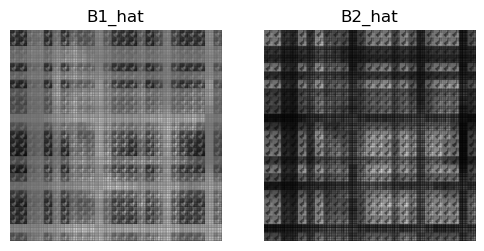

In [12]:
# verlas ambas imagenes
print(f"Shape of B_hat 1: {B_hat[0].shape}")
print(f"Shape of B_hat 2: {B_hat[1].shape}")
ver_2_matrices(B_hat[0], B_hat[1], titulo_1 = "B1_hat", titulo_2 = "B2_hat")

In [13]:
# separ ambas señales originales estimadas
# CREO QUE DELIMITAR EL INDICE 1 O 2 DEBE DE HACERSE DE FORMA MANUAL
# B1_HAT ES LA MATRIZ QUE PARECE VENIR DE: np.kron(imagen_1, P)
# B2_HAT ES LA MATRIZ QUE PARECE VENIR DE: np.kron(p, imagen_2)
B1_hat = B_hat[0]
B2_hat = B_hat[1]

In [14]:
# para recuperar las imagenes originales se necesita una entrada "especial del vector v"
# usar una entrada que no sea muy cercana a 0 (evitar errores numericos)
entrada_especial_v = v.argmax()
# entrada_especial_v = v.argmin() por ejemplo, ver que esto causa error

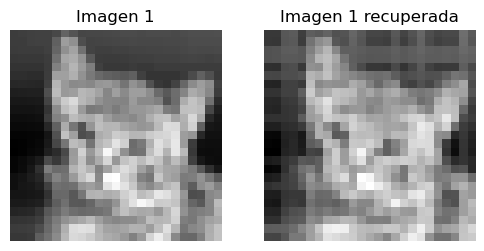

In [15]:
# usar B1_hat para recuperar imagen1_hat
# PODRIA CAMBIAR EL SIGNO, AJUSTAR MANUAL LO DEL SIGNO
imagen1_hat = ( B1_hat[entrada_especial_v + np.arange(0, n)*n, :][:, entrada_especial_v + np.arange(0, n)*n] )
imagen1_hat = imagen1_hat / (v[entrada_especial_v])**2  # segun yo se debe de normalizar

# comparar
ver_2_matrices(imagen_1, imagen1_hat, titulo_1 = "Imagen 1", titulo_2 = "Imagen 1 recuperada")

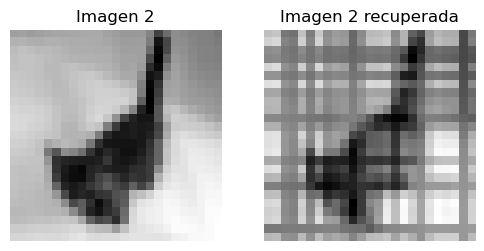

In [16]:
# usar B2_hat para recuperar imagen2_hat
# PODRIA CAMBIAR EL SIGNO, AJUSTAR MANUAL LO DEL SIGNO
imagen2_hat =  1 * B2_hat[entrada_especial_v*n : entrada_especial_v*n +n, entrada_especial_v*n : entrada_especial_v*n + n]
imagen2_hat = imagen2_hat / (v[entrada_especial_v])**2  # segun yo se debe de normalizar

# comparar
ver_2_matrices(imagen_2, imagen2_hat, titulo_1 = "Imagen 2", titulo_2 = "Imagen 2 recuperada")